In [8]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
sys.path.append(nb_dir)
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

from common import data_manager as dm, utils

In [9]:
ROOT = os.path.join(os.getcwd(), '../', '../')
pickle_file = os.path.join(ROOT, 'cache', 'telemetry_new.npy')

In [10]:
# Import new data
extractor = dm.PickleExtractor(pickle_file)
X = extractor.get_sequential_features
X = utils.pad_dataframe(X, 3, -121)
y = extractor.get_labels

n_samples, timesteps, m_features = X.shape
X = X.reshape(-1, timesteps*m_features)
print(X.shape)

(4123, 21)


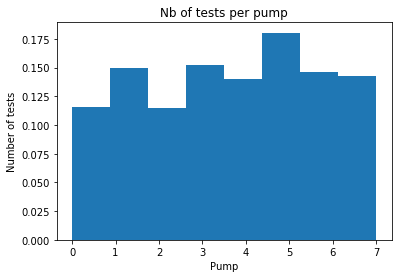

In [11]:
#plot the labels to see class balance
plt.hist(y, 8, normed=True)
plt.xlabel("Pump")
plt.ylabel("Number of tests")
plt.title("Nb of tests per pump")
plt.show()

### Visualise the Data

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA

#X_std = StandardScaler().fit_transform(X)
X_std = MinMaxScaler().fit_transform(X)

#X_reduced = KernelPCA(n_components=3, kernel="cosine", gamma=1/63, degree=5).fit_transform(X_std)
X_reduced = PCA(n_components=3).fit_transform(X_std)

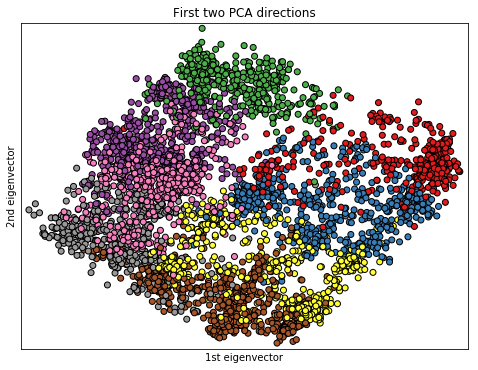

In [23]:
x_min, x_max = X_reduced[:, 0].min() - 0.05, X_reduced[:, 0].max() + 0.05
y_min, y_max = X_reduced[:, 1].min() - 0.05, X_reduced[:, 1].max() + 0.05

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.title("First two PCA directions")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

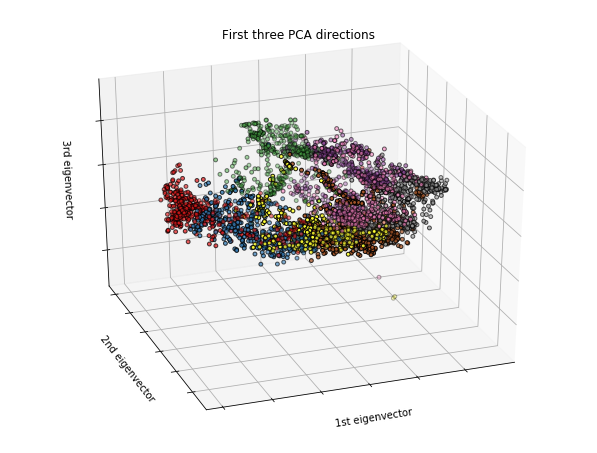

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=15)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [24]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X_std)
print(X_tsne)

[[ 24.6293087   45.21811676]
 [-30.77959442 -35.09316635]
 [-66.75288391 -16.25830078]
 ..., 
 [ -5.23167467   2.04855895]
 [  8.34971142  -4.60068083]
 [ 10.45188332  -5.59647322]]


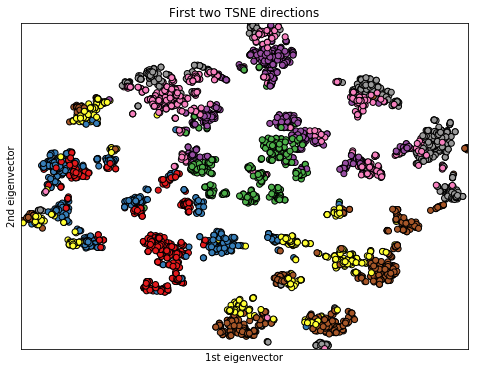

In [18]:
x_min, x_max = X_tsne[:, 0].min() - .5, X_tsne[:, 0].max() + .5
y_min, y_max = X_tsne[:, 1].min() - .5, X_tsne[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.title("First two TSNE directions")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()